In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

Without null values

In [ ]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df.shape

(150, 5)

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [ ]:
df['target'] = df['target'].astype(int)
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [ ]:
X = df.drop(['target', 'species'], axis=1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


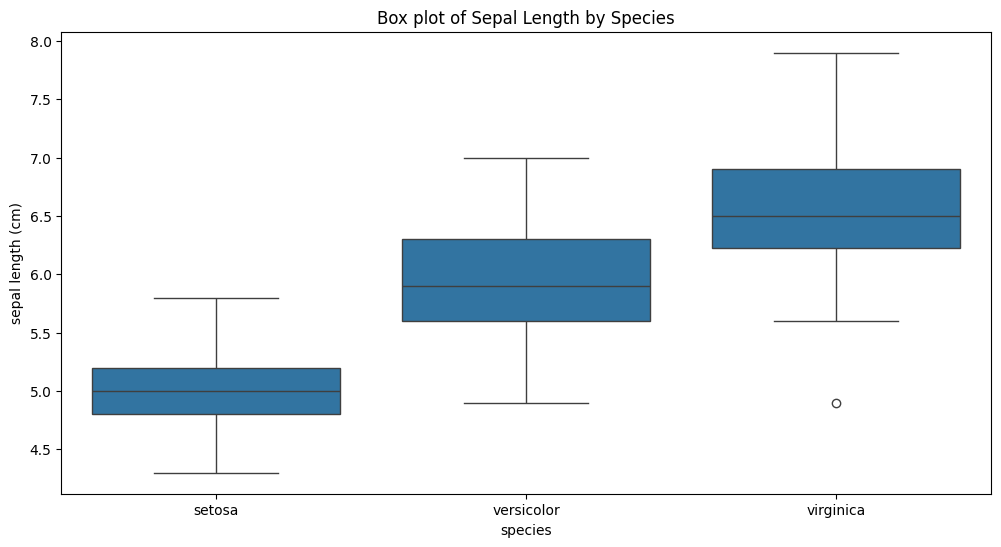

In [ ]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title('Box plot of Sepal Length by Species')
plt.show()

With null values


In [ ]:
df.iloc[5:10, df.columns.get_loc('sepal length (cm)')] = np.nan

In [ ]:
df.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,NaN,3.9,1.7,0.4,0,setosa
6,NaN,3.4,1.4,0.3,0,setosa
7,NaN,3.4,1.5,0.2,0,setosa
8,NaN,2.9,1.4,0.2,0,setosa
9,NaN,3.1,1.5,0.1,0,setosa


In [ ]:
df['sepal length (cm)'].fillna(df['sepal length (cm)'].mean(), inplace = True)

/tmp/ipython-input-18-2937669574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sepal length (cm)'].fillna(df['sepal length (cm)'].mean(), inplace = True)


In [ ]:
df.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.100000,3.5,1.4,0.2,0,setosa
1,4.900000,3.0,1.4,0.2,0,setosa
2,4.700000,3.2,1.3,0.2,0,setosa
3,4.600000,3.1,1.5,0.2,0,setosa
4,5.000000,3.6,1.4,0.2,0,setosa
5,5.877241,3.9,1.7,0.4,0,setosa
6,5.877241,3.4,1.4,0.3,0,setosa
7,5.877241,3.4,1.5,0.2,0,setosa
8,5.877241,2.9,1.4,0.2,0,setosa
9,5.877241,3.1,1.5,0.1,0,setosa


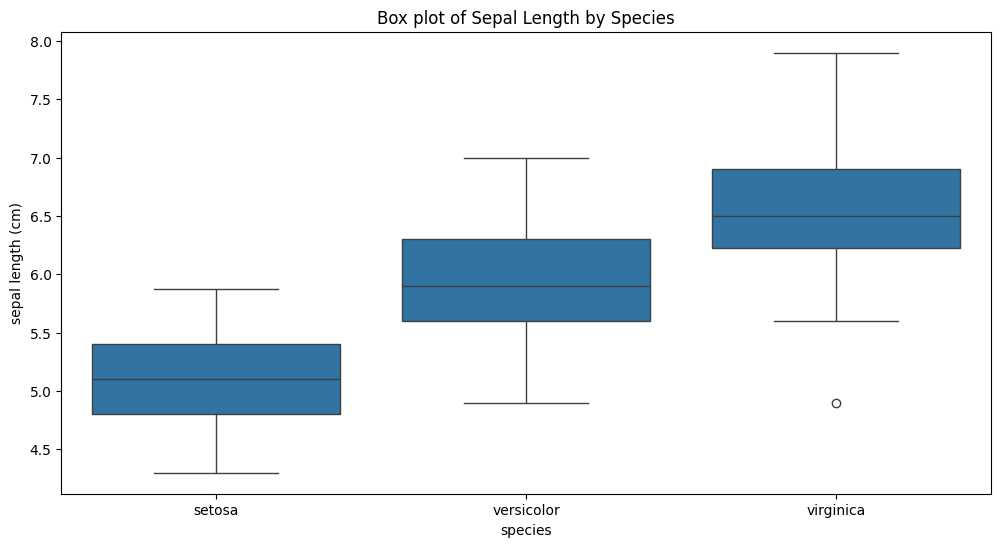

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title('Box plot of Sepal Length by Species')
plt.show()

In [ ]:
df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
df['sepal length (cm)'].describe()

,sepal length (cm)
count,150.000000
mean,5.877241
std,0.805080
min,4.300000
25%,5.200000
50%,5.838621
75%,6.400000
max,7.900000


In [ ]:
one_hot_encoded = pd.get_dummies(df['species'], prefix='species')

In [ ]:
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

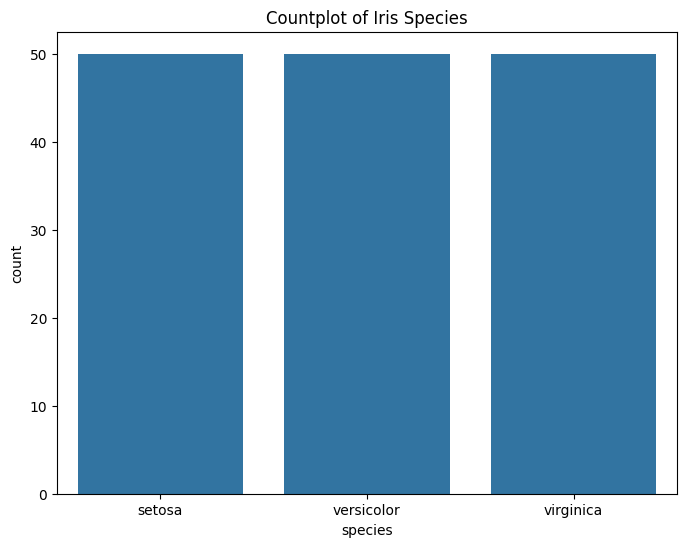

In [ ]:
# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=df)
plt.title('Countplot of Iris Species')
plt.show()

Box plot of a given array


In [ ]:
data = [100, 120, 130, 150, 180, 220, 250]

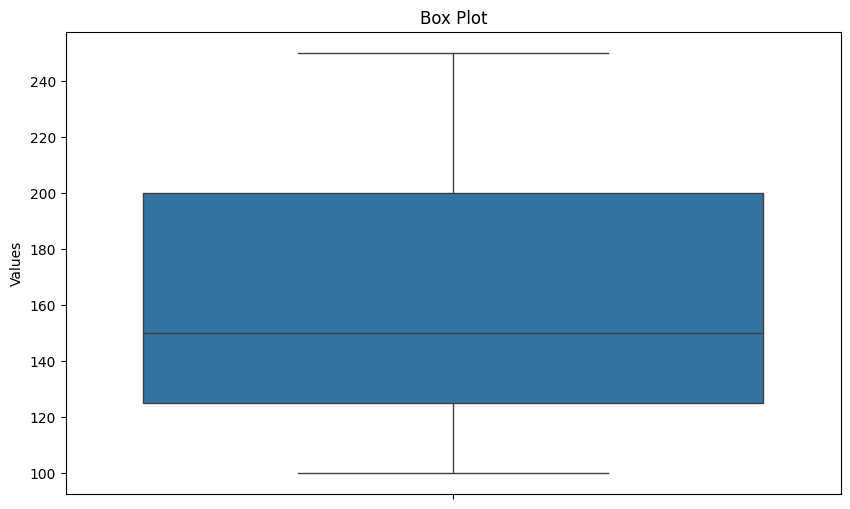

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data)
plt.title('Box Plot')
plt.ylabel('Values')
plt.show()

In [ ]:
data = [0, 100, 120, 130, 150, 180, 220, 250, 400]

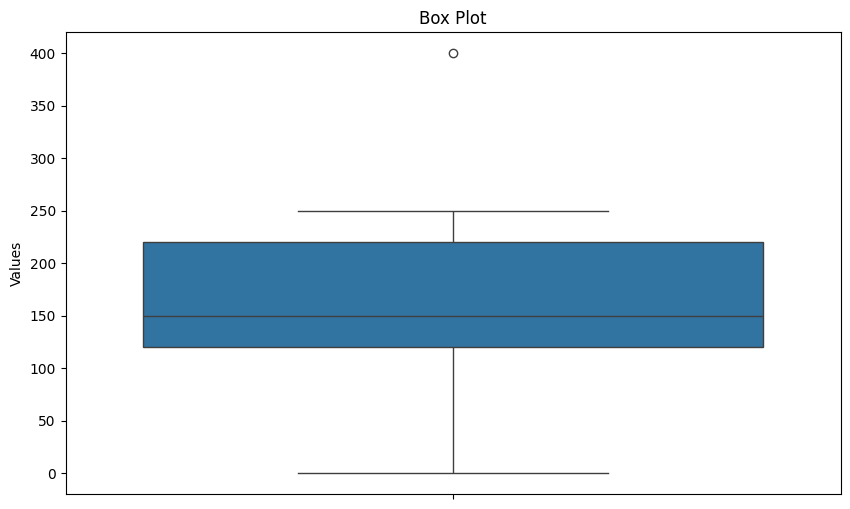

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data)
plt.title('Box Plot')
plt.ylabel('Values')
plt.show()